In [58]:
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

Reading in data

In [16]:
data = pd.read_excel("Online Retail.xlsx")
ap_data = data
data.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [3]:
data.dropna(inplace = True)
data["Description"] = data["Description"].astype("category")
data["Country"] = data["Country"].astype("category")
data["InvoiceNo"] = data["InvoiceNo"].astype(str)

In [4]:
data.dtypes

InvoiceNo              object
StockCode              object
Description          category
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country              category
dtype: object

### EDA

What time of day do people often online shop?

In [5]:
hour_list = []
def getHour(x):
    return x.hour
hour_list = data["InvoiceDate"].map(getHour)

In [6]:
hour_list.value_counts().reset_index()

,index,InvoiceDate
0,12,73342
1,13,65062
2,14,55075
3,11,50249
4,15,46220
5,10,38951
6,16,24997
7,9,22464
8,17,13734
9,8,8792


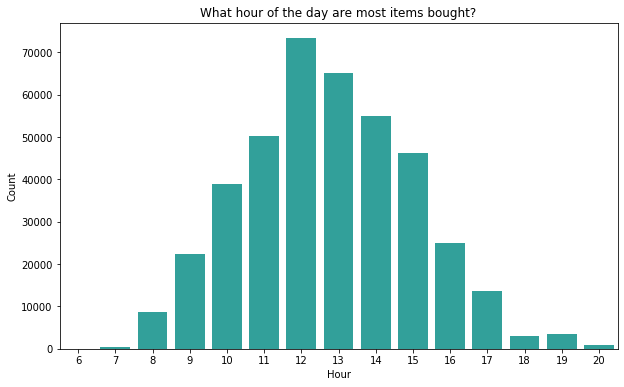

In [55]:
plt.figure(figsize = (10,6))
ax = sns.barplot(x = "index", y = "InvoiceDate", data = hour_list.value_counts().reset_index(), color = "lightseagreen")
ax.set(xlabel='Hour', ylabel='Count')
ax.set_title('What hour of the day are most items bought?')
plt.show()

In [60]:
day = []
def get_dow(x):
    return calendar.day_name[x.weekday()]
day = data['InvoiceDate'].map(get_dow)

In [63]:
day.value_counts().reset_index()

,index,InvoiceDate
0,Thursday,103857
1,Tuesday,101808
2,Monday,95111
3,Wednesday,94565
4,Friday,82193
5,Sunday,64375


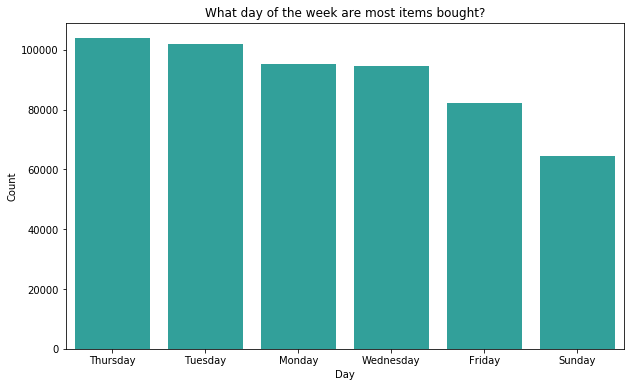

In [65]:
plt.figure(figsize = (10,6))
ax2 = sns.barplot(x = "index", y = "InvoiceDate", data = day.value_counts().reset_index(), color = "lightseagreen")
ax2.set(xlabel='Day', ylabel='Count')
ax2.set_title('What day of the week are most items bought?')
plt.show()

Most items are bought on Thursday 

Top sellers

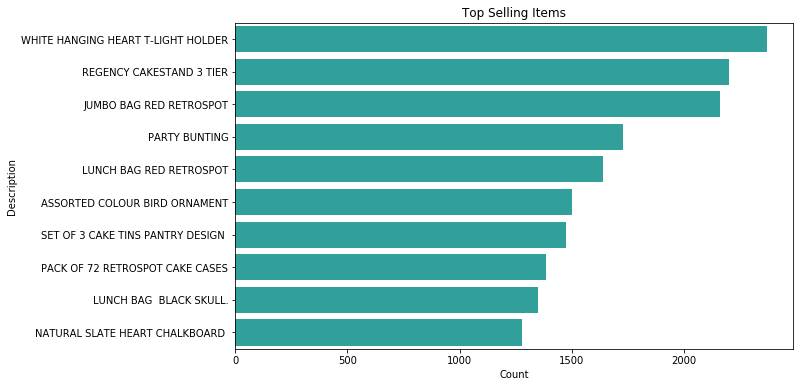

In [54]:
plt.figure(figsize = (10,6))
descrip_data = data['Description'].value_counts()[:10].reset_index()
descrip_data = descrip_data.rename(columns = {'index': 'Description', 'Description':'Count'})
ax1 = sns.barplot(x = 'Count', y = 'Description', data = descrip_data, color = 'lightseagreen')
ax1.set_title('Top Selling Items')
plt.show()

Get all items in a transaction into one row

In [9]:
transactions = data.drop(['InvoiceDate', 'CustomerID'], 1)
trans_data = transactions[['InvoiceNo', 'Description']].groupby("InvoiceNo").apply(lambda x: ','.join(x.Description))

In [10]:
trans_data = trans_data.reset_index()
trans_data = trans_data.rename(columns = {0:"Description"})
transactions_df = trans_data["Description"].str.split(",", expand = True)

In [56]:
transactions_df.head()

,0,1,2,3,4,5,6,7,8,9,...,540,541,542,543,544,545,546,547,548,549
0,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.,SET 7 BABUSHKA NESTING BOXES,GLASS STAR FROSTED T-LIGHT HOLDER,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,ASSORTED COLOUR BIRD ORNAMENT,POPPY'S PLAYHOUSE BEDROOM,POPPY'S PLAYHOUSE KITCHEN,FELTCRAFT PRINCESS CHARLOTTE DOLL,IVORY KNITTED MUG COSY,BOX OF 6 ASSORTED COLOUR TEASPOONS,BOX OF VINTAGE JIGSAW BLOCKS,BOX OF VINTAGE ALPHABET BLOCKS,HOME BUILDING BLOCK WORD,LOVE BUILDING BLOCK WORD,...,None,None,None,None,None,None,None,None,None,None
3,JAM MAKING SET WITH JARS,RED COAT RACK PARIS FASHION,YELLOW COAT RACK PARIS FASHION,BLUE COAT RACK PARIS FASHION,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,BATH BUILDING BLOCK WORD,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


Descriptive Statistics about transactions

In [67]:
#the number of different items in each transaction
#22190 different transactions
transactions_df.count(axis = 1)
#how many transactions had 1 unique item? 2? etc.
#3371 transactions had 1 unique item
transactions_df.count(axis = 1).value_counts()

#basic statistics on the number of different items in each transaction
DataFrame(transactions_df.count(axis = 1).describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
0,22190.0,18.507391,24.162584,1.0,3.0,12.0,24.0,550.0


### Apriori Algorithm
Now we want to see which items are most bought together and statistics to go with it.

In [14]:
from mlxtend.frequent_patterns import apriori, association_rules

In [17]:
#how many items total and which items for each transaction in each country
france = (ap_data[ap_data['Country'] == "France"].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')) 
uk = (ap_data[ap_data['Country'] == "United Kingdom"].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')) 
portugal = (ap_data[ap_data['Country'] == "Portugal"].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')) 
sweden = (ap_data[ap_data['Country'] == "Sweden"].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')) 

In [18]:
#one hot encode for items (if it was bought or not, not how many)
def hot_encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1

In [19]:
france_enc = france.applymap(hot_encode)
uk_enc = uk.applymap(hot_encode)
portugal_enc = portugal.applymap(hot_encode)
sweden_enc = sweden.applymap(hot_encode)

Antecedents: Group of things people buy

Consequents: Things people also buy if they buy the antecedents

Support: Probability antecedent will occur

Confidence: Probability of buying consequents given antecedents were purchased

Lift:
- A lift greater than 1 suggests that the presence of the antecedent increases the chances that the consequent will occur in a given transaction
- Lift below 1 indicates that purchasing the antecedent reduces the chances of purchasing the consequent in the same transaction
- When the lift is 1, then purchasing the antecedent makes no difference on the chances of purchasing the consequent

In [20]:
#min_support = 0.05 means a set of items that appear at least 5% of the time in all transactions in the dataset
france_fb = apriori(france_enc, min_support = 0.05, use_colnames = True) 
france_rules = association_rules(france_fb, metric ="lift", min_threshold = 1) 
france_rules = france_rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
france_rules[:5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25,(JUMBO BAG WOODLAND ANIMALS),(POSTAGE),0.065076,0.650759,0.065076,1.000000,1.536667,0.022727,inf
184,"(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...",(SET/6 RED SPOTTY PAPER PLATES),0.086768,0.108460,0.084599,0.975000,8.989500,0.075188,35.661605
185,"(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...",(SET/6 RED SPOTTY PAPER CUPS),0.086768,0.117137,0.084599,0.975000,8.323611,0.074435,35.314534
190,"(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...",(SET/6 RED SPOTTY PAPER PLATES),0.071584,0.108460,0.069414,0.969697,8.940606,0.061650,29.420824
192,"(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...",(SET/6 RED SPOTTY PAPER CUPS),0.071584,0.117137,0.069414,0.969697,8.278339,0.061029,29.134490


In [37]:
france_rules2 = association_rules(france_fb, metric ="lift", min_threshold = 1) 
france_rules2 = france_rules2.sort_values(['conviction'], ascending = True) 
france_rules2[:5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(POSTAGE),(DOLLY GIRL LUNCH BOX),0.650759,0.084599,0.062907,0.096667,1.142650,0.007853,1.013359
64,(POSTAGE),(PLASTERS IN TIN STRONGMAN),0.650759,0.069414,0.054230,0.083333,1.200521,0.009058,1.015184
122,(POSTAGE),"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",0.650759,0.062907,0.052061,0.080000,1.271724,0.011124,1.018580
47,(POSTAGE),(MINI PAINT SET VINTAGE ),0.650759,0.088937,0.069414,0.106667,1.199350,0.011538,1.019847
88,(POSTAGE),(SET/10 RED POLKADOT PARTY CANDLES),0.650759,0.065076,0.054230,0.083333,1.280556,0.011881,1.019917


In [25]:
uk_fb = apriori(uk_enc, min_support = 0.02, use_colnames = True) 
uk_rules = association_rules(uk_fb, metric ="lift", min_threshold = 1) 
uk_rules = uk_rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
uk_rules[:5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
83,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.024773,0.042377,0.022368,0.902930,21.306837,0.021319,9.865319
82,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.026180,0.043421,0.022368,0.854419,19.677538,0.021232,6.570786
10,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.031897,0.042377,0.026180,0.820768,19.368019,0.024828,5.342926
72,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.031897,0.043421,0.024773,0.776671,17.886978,0.023388,4.283280
14,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.042377,0.043421,0.031806,0.750535,17.285056,0.029966,3.834527


In [35]:
#there is a 2% chance customers will buy pink and rose teacup and saucer
#there is a 90% chance customers will also buy green teacup and saucer given they bought the pink and rose ones
#there is a strong association (lift = 21) between the pink and rose teacups and the green teacups (makes sense)
#this rule is incorrect 9X more than if the relationship occurred due to random chance (we want LOW conviction)
print(uk_rules['antecedents'].iloc[0])
print(uk_rules['consequents'].iloc[0])

frozenset({'PINK REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '})
frozenset({'GREEN REGENCY TEACUP AND SAUCER'})


Sort by conviction

In [36]:
#we see that people who buy white hanging lights
#2% chance white lights are bought
#21% chance red lights are bought if white lights are bought
#there is an association (lift of 6) between the white and red lights
#this rule is incorrect 20% more than if due to random chance
#UK has higher conviction rates than France, Portugal, or Sweden. 
#This just means that these associations are not as strongly define and people in UK 
#do not tend to buy in these types of patterns as much as the other countries
uk_rules2 = association_rules(uk_fb, metric ="lift", min_threshold = 1) 
uk_rules2 = uk_rules2.sort_values(['conviction'], ascending = True)
uk_rules2[:5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
74,(WHITE HANGING HEART T-LIGHT HOLDER),(RED HANGING HEART T-LIGHT HOLDER),0.098276,0.031942,0.021234,0.216066,6.764354,0.018095,1.234873
32,(JUMBO BAG RED RETROSPOT),(JUMBO BAG WOODLAND ANIMALS),0.087931,0.033348,0.021506,0.244582,7.334134,0.018574,1.279625
29,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK VINTAGE PAISLEY),0.087931,0.036978,0.022142,0.251806,6.809575,0.018890,1.287128
38,(JUMBO BAG RED RETROSPOT),(LUNCH BAG RED RETROSPOT),0.087931,0.063158,0.024093,0.273994,4.338235,0.018539,1.290405
6,(JUMBO BAG RED RETROSPOT),(DOTCOM POSTAGE),0.087931,0.032123,0.022005,0.250258,7.790517,0.019181,1.290946


In [26]:
portugal_fb = apriori(portugal_enc, min_support = 0.05, use_colnames = True) 
portugal_rules = association_rules(portugal_fb, metric ="lift", min_threshold = 1)
portugal_rules = portugal_rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
portugal_rules[:5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
62,(CHARLOTTE BAG VINTAGE ALPHABET ),(LUNCH BAG ALPHABET DESIGN),0.056338,0.056338,0.056338,1.0,17.75,0.053164,inf
63,(LUNCH BAG ALPHABET DESIGN),(CHARLOTTE BAG VINTAGE ALPHABET ),0.056338,0.056338,0.056338,1.0,17.75,0.053164,inf
190,(JUMBO BAG VINTAGE LEAF),(LUNCH BAG VINTAGE LEAF DESIGN),0.056338,0.056338,0.056338,1.0,17.75,0.053164,inf
191,(LUNCH BAG VINTAGE LEAF DESIGN),(JUMBO BAG VINTAGE LEAF),0.056338,0.056338,0.056338,1.0,17.75,0.053164,inf
598,"(LUNCH BAG DOILEY PATTERN , LUNCH BAG RED RETR...",(JUMBO BAG DOILEY PATTERNS),0.056338,0.056338,0.056338,1.0,17.75,0.053164,inf


In [38]:
portugal_rules2 = association_rules(portugal_fb, metric ="lift", min_threshold = 1)
portugal_rules2 = portugal_rules2.sort_values(['conviction'], ascending = True) 
portugal_rules2[:5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
260,(POSTAGE),(LUNCH BAG DOLLY GIRL DESIGN),0.422535,0.112676,0.056338,0.133333,1.183333,0.008728,1.023835
55,(POSTAGE),(CHARLOTTE BAG SUKI DESIGN),0.422535,0.140845,0.070423,0.166667,1.183333,0.010911,1.030986
3,(POSTAGE),(4 TRADITIONAL SPINNING TOPS),0.422535,0.098592,0.056338,0.133333,1.352381,0.014680,1.040087
362,(POSTAGE),(SET 3 PAPER VINTAGE CHICK PAPER EGG),0.422535,0.098592,0.056338,0.133333,1.352381,0.014680,1.040087
361,(POSTAGE),(RETROSPOT TEA SET CERAMIC 11 PC ),0.422535,0.197183,0.098592,0.233333,1.183333,0.015275,1.047152


In [27]:
sweden_fb = apriori(sweden_enc, min_support = 0.05, use_colnames = True) 
sweden_rules = association_rules(sweden_fb, metric ="lift", min_threshold = 1) 
sweden_rules = sweden_rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
sweden_rules[:5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(TREASURE TIN BUFFALO BILL ),(BUBBLEGUM RING ASSORTED),0.065217,0.065217,0.065217,1.0,15.333333,0.060964,inf
13,(BUBBLEGUM RING ASSORTED),(TREASURE TIN BUFFALO BILL ),0.065217,0.065217,0.065217,1.0,15.333333,0.060964,inf
14,(BUBBLEGUM RING ASSORTED),(TREASURE TIN GYMKHANA DESIGN),0.065217,0.065217,0.065217,1.0,15.333333,0.060964,inf
15,(TREASURE TIN GYMKHANA DESIGN),(BUBBLEGUM RING ASSORTED),0.065217,0.065217,0.065217,1.0,15.333333,0.060964,inf
32,(MAGIC DRAWING SLATE PURDEY),(MAGIC DRAWING SLATE DOLLY GIRL ),0.065217,0.065217,0.065217,1.0,15.333333,0.060964,inf


In [39]:
sweden_rules2 = association_rules(sweden_fb, metric ="lift", min_threshold = 1) 
sweden_rules2 = sweden_rules2.sort_values(['conviction'], ascending = True) 
sweden_rules2[:5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
71,(POSTAGE),(ROUND SNACK BOXES SET OF 4 FRUITS ),0.478261,0.086957,0.065217,0.136364,1.568182,0.023629,1.057208
77,(POSTAGE),(WOODEN OWLS LIGHT GARLAND ),0.478261,0.086957,0.065217,0.136364,1.568182,0.023629,1.057208
19,(POSTAGE),(CHILDRENS CUTLERY POLKADOT PINK),0.478261,0.065217,0.065217,0.136364,2.090909,0.034026,1.082380
61,(POSTAGE),(PAPER BUNTING RETROSPOT),0.478261,0.065217,0.065217,0.136364,2.090909,0.034026,1.082380
63,(POSTAGE),(PINK BABY BUNTING),0.478261,0.065217,0.065217,0.136364,2.090909,0.034026,1.082380


References
- https://www.analyticsvidhya.com/blog/2017/08/mining-frequent-items-using-apriori-algorithm/
- https://www.geeksforgeeks.org/implementing-apriori-algorithm-in-python/
- https://smartbridge.com/market-basket-analysis-101/
- https://www.hackerearth.com/blog/developers/beginners-tutorial-apriori-algorithm-data-mining-r-implementation
- http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/#api
- http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/#api
- https://paginas.fe.up.pt/~ec/files_1112/week_04_Association.pdf